<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DeepLearning/blob/main/04.Paper-with-code/%5BPaper_Review%5DTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformer
---
Reference

* https://arxiv.org/pdf/1706.03762v5.pdf
* https://blog.promedius.ai/transformer/
* https://omicro03.medium.com/attention-is-all-you-need-transformer-paper-%EC%A0%95%EB%A6%AC-83066192d9ab




## 3.  Model Architecture


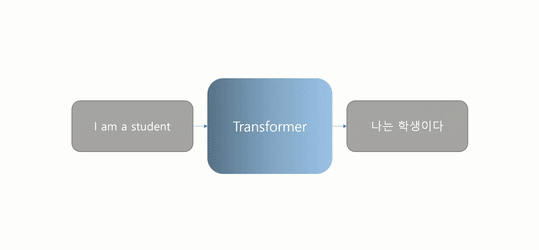

Transformer는 여러 개의 encoder block과 decoder block으로 구성되어 있다. 

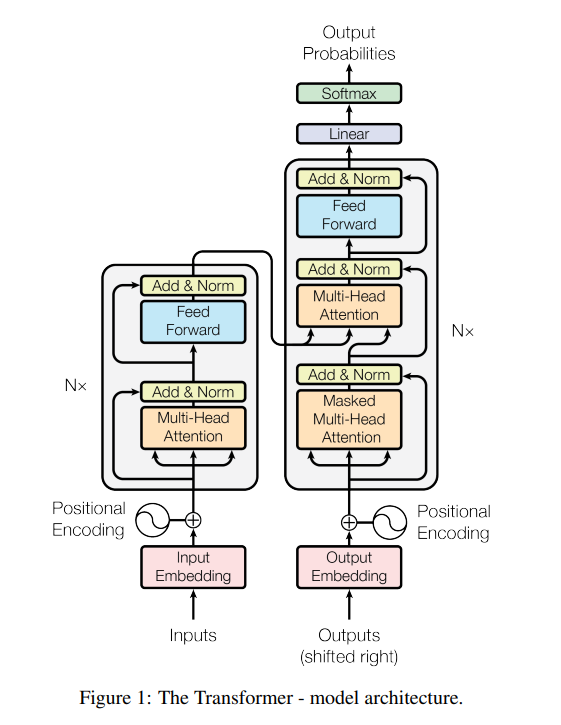

### Encoder 

1. Self-Attention

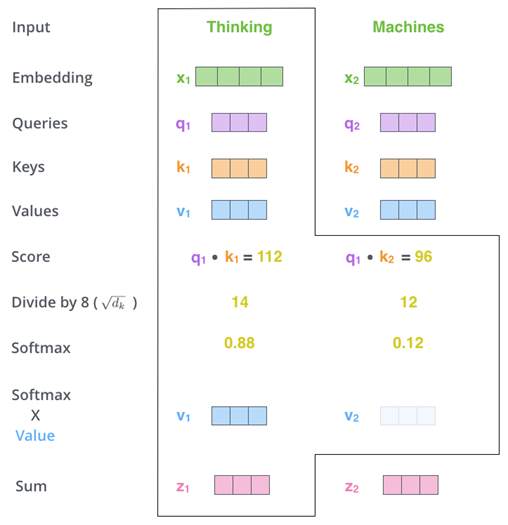


* Embedding을 거친 문장은 크기가 n인 벡터들의 리스트로 변환되어 첫 encoder block의 attention layer의 input이 된다. 

* input은 weight와의 벡터곱을 통해 Query, Key, Value 3가지 종류의 새로운 벡터를 만든다.


* Query vector는 자기자신을 포함(**Self**-Attention), 문장의 다른 단어들의 Key vector들과 곱(내적)한다. 이렇게 함으로써 각 단어가 서로에게 얼마나 중요한지 파악할 수 있다. 내적하여 얻어진 각 값들은 계산의 편의를 위해 Key vector 크기의 제곱근으로 나눠진 뒤, softmax를 적용해 합이 1이 되도록 한다. 거기에 각 단어의 value vector를 곱한 뒤 모두 더하면 self-attention layer의 output이 나온다. 

> 각 단어들의 query와 key vector 연산을 통해 관계를 유추하기에 이 전의 NLP 알고리즘과는 달리 문장내 단어간 거리가 문제가 되지 않는다.

2. Multi-Head Attention

Attention은 단독으로 쓸 경우 자기자신의 의미에만 지나치게 집중할 수 있기에 논문에서는 8개의 attention layer를 두고 각각 다른 초기값으로 학습을 진행하였다. 각 layer에서 나온 출력은 그대로 합한 뒤 또다른 weight vector를 곱해 하나의 vector로 취합하여 multi-head attention layer의 output이 된다.

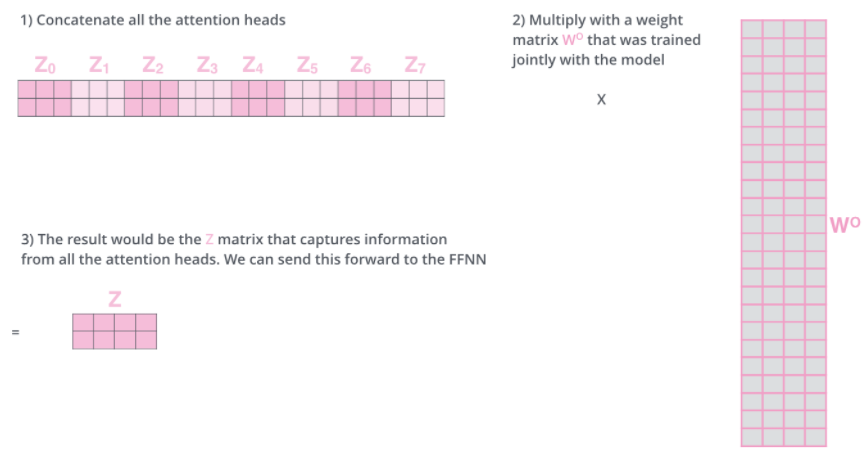

> 장점: 8개의 서로 다른 representation subspace를 가짐으로써 single-head attention보다 문맥을 더 잘 이해할 수 있게 된다 single-head attention의 경우 하나의 단어와의 연관성만을 중시할 가능성이 높지만, multi-head attention은 layer를 여러 번 조금 다른 초기 조건으로 학습시킴으로써 더 많은 단어 후보군을 제공한다.

3. Position-Wise 

attention layer의 output은 fully connected feed-foward network를 지나가게 된다.


### Positional Encoding

문장을 이해하는데 있어 단어의 순서는 중요하므로, 단어가 인코더 블록에 들어가기 전에 embedding vector로 변환될 때, positional encoding이 더해진채 인코더 블록에 입력된다.

### Decoder Block

* Encoder 가장 상단의 output은 key와 value vector로 바뀌고 이 벡터들이 decoder의 각 encoder-decoder attention layer에 사용된다. 

* self-attention시 현재 위치의 이전 위치에 대해서만 attention할 수 있도록 이후 위치에 대해서는 -∞로 마스킹을 한다. 

* 통과된 vector중 query만 가져오고, key와 value vector는 인코더 블록의 출력을 사용한다.


* 인코더와 마찬가지로 6개의 블록을 통과하면 그 출력은 FCN과 Softmax를 거쳐 학습된 단어 데이터베이스 중 가장 관계가 깊어보이는 단어를 출력하게 된다.





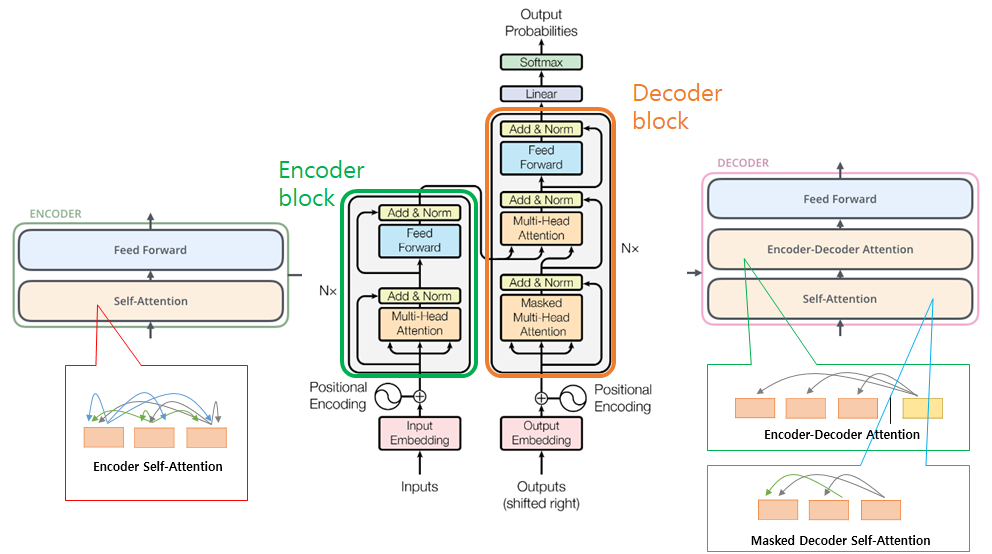